## Challenge: Feedback Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
sentiment_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ('review', 'sentiment') 
# print(sentiment_raw)

In [3]:
negative_words = pd.read_csv('neg_sent.txt', delimiter= '\t', header=None)
# print(negative_words)

# re.findall(r'\w+(?:-\w+)+', negative_words)
# negative_words = negative_words.replace('-', ' ', inplace=False, regex=True)

keywords = ['flat', 'lacks', 'vomit', 'bore', 'boring', 'horrible', 'predictable', 'unfortunately',
            'embarrassing', 'stupid', 'lack', 'lacked', 'bland',
            'insult', 'slow-moving', 'aimless', 'bad']

# for words in negative_words:
#     sentiment_raw[str(words)] = sentiment_raw.review.str.contains(
#         str(words),
#         case=False
#     )
    
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.review.str.contains(
        str(key),
        case=False
    )
print(sentiment_raw)
# print(negative_words)

                                                review  sentiment   flat  \
0    A very, very, very slow-moving, aimless movie ...          0  False   
1    Not sure who was more lost - the flat characte...          0   True   
2    Attempting artiness with black & white and cle...          0  False   
3         Very little music or anything to speak of.            0  False   
4    The best scene in the movie was when Gerardo i...          1  False   
5    The rest of the movie lacks art, charm, meanin...          0  False   
6                                  Wasted two hours.            0  False   
7    Saw the movie today and thought it was a good ...          1  False   
8                                 A bit predictable.            0  False   
9    Loved the casting of Jimmy Buffet as the scien...          1  False   
10                And those baby owls were adorable.            1  False   
11   The movie showed a lot of Florida at it's best...          1  False   
12   The Son

In [4]:
sentiment_raw['negative'] = (sentiment_raw['review'] == '0')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

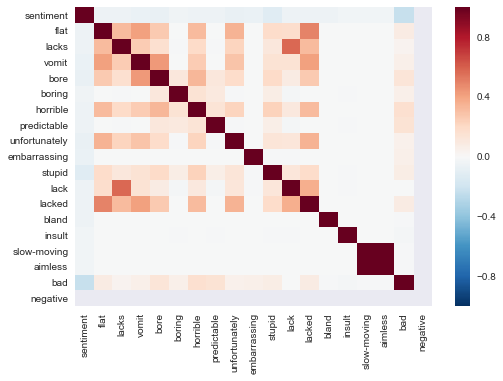

In [5]:
sns.heatmap(sentiment_raw.corr())

In [6]:
data = sentiment_raw[keywords]
target = sentiment_raw['negative']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 0


/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
